In [ ]:
import os
from google.colab import drive
try:
  drive.mount('/content/drive/')
  os.chdir("/content/drive/MyDrive/Lectures/2022 Tedu/Time_Series/slides/codes/W8")
except Exception:
  print("Something went wrong with directories or maybe you are not connected to Google Drive")
finally:
  print(os.listdir())
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['P2.ipynb', 'combined_csv.csv']


### See [the link text](https://www.kaggle.com/datasets/ibrahimkiziloklu/solar-radiation-dataset) for the description of the dataset.

In [ ]:
data_ = pd.read_csv("combined_csv.csv")
 #### we will use the windspeed

In [ ]:
data_

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Wind Speed,Unnamed: 18
0,2017,1,1,0,0,-0.6,0,0,0,-2.6,0,0,0,86.29,152.92,0.12,1003,1.7,NaN
1,2017,1,1,0,15,-0.6,0,0,0,-2.6,0,0,0,86.29,150.22,0.12,1003,1.7,NaN
2,2017,1,1,0,30,-0.6,0,0,0,-2.6,0,0,0,86.29,147.43,0.12,1003,1.7,NaN
3,2017,1,1,0,45,-0.6,0,0,0,-2.7,0,0,0,85.54,144.60,0.12,1003,1.6,NaN
4,2017,1,1,1,0,-0.7,0,0,0,-2.7,0,0,0,86.17,141.71,0.12,1003,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019,12,31,22,45,4.0,0,0,0,4.0,0,0,0,100.00,163.63,0.12,999,2.0,NaN
105116,2019,12,31,23,0,3.9,0,0,0,3.9,0,0,0,100.00,162.09,0.12,999,2.0,NaN
105117,2019,12,31,23,15,3.9,0,0,0,3.9,0,0,0,100.00,160.16,0.12,999,2.0,NaN
105118,2019,12,31,23,30,3.9,0,0,0,3.9,0,0,0,100.00,157.93,0.12,999,2.0,NaN


In [ ]:
data = data_["Wind Speed"]

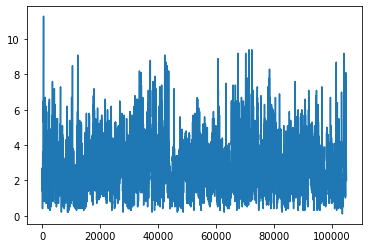

In [ ]:
plt.plot(data)   #### you see there is not explicit trend, nor unit root.

In [ ]:
def splitter(data, alpha = 0.8): 
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [ ]:
data_train, data_test = splitter(data) 

In [ ]:
##### In this cell further dissect data_train into data_val and data_train using the splitter function. Make sure that the validation set is named data_val


In [ ]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.plot(data_val, label = "validation")
plt.legend()
plt.show()
###When you run this cell you chould see your dissectation if you see and error or something bizzare go check the previous cell.

In [ ]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+1+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [ ]:
###Make necessary changes in this cell so that you have X_train, y_train, X_val, y_val, X_test, y_test
(X_train, y_train), (X_test, y_test) =  sliding_window(data_train), sliding_window(data_test)

## KNN

In [ ]:
###This example is for n_neighbors = 3 case, 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = knn.predict(X_test)

In [ ]:
"""
Assume that we have a list L = [10, 12, 5, 12, 125, 23], we want to find the maximal element of this set
to do this, we follow the following snippet
initial_pt = 0
for i in L:
  if i > initial_pt:
    initial_pt = i
This code snippet returns you the maximal element of L. Similarly, it will return you minimal element after a minimal 
change. Please understand what happens here, using the same idea, also find the place of maximal element. Then jump to the following steps 
as the ideas herein will be used below.
"""

"""
Steps - to get the best set on validation set. 

1) initialize p = [] empty list holding the best hyperparameters.
2) initialize r_score = 0
3) in a nested for loop, do a grid search.
    if r_score is worse than the previous one on the validation set, then set r2 as the new r_score 
4) Finally test your best parameters on the test set, see if you do really good.
"""


## Time for neural networks

In [ ]:
#### This example is for neural network with a single hidden layer, that is of size 25.
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)